In [1]:
pip install pandas openpyxl

# Upload data and Merge data files

In [2]:
from google.colab import files
uploaded = files.upload()


Saving PRAC DATA.rar to PRAC DATA.rar


In [3]:
pip install rarfile


In [4]:
import rarfile
rf = rarfile.RarFile('PRAC DATA.rar')  # replace 'your_file.rar' with the name of your uploaded .rar file
rf.extractall()  # This will extract all files to the current directory


In [5]:
import pandas as pd
import os


In [6]:
import os

# List all files in the current directory to confirm the CSV files were extracted
extracted_files = os.listdir()
print(extracted_files)


['.config', 'PRAC DATA', 'PRAC DATA.rar', 'sample_data']


In [7]:
# Install rarfile library if not already installed
!pip install rarfile

import rarfile

# Define the name of the uploaded rar file
rar_file = 'PRAC DATA.rar'  # Replace with your actual .rar file name
rf = rarfile.RarFile(rar_file)

# Extract the contents of the .rar file to the current directory
rf.extractall()

# List the files in the directory to verify extraction
import os
extracted_files = os.listdir()
print(extracted_files)


['.config', 'PRAC DATA', 'PRAC DATA.rar', 'sample_data']


In [8]:
# Recursively find all CSV files in the current directory and subdirectories
csv_files = []
for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# Print the list of CSV files to confirm they are found
print(csv_files)


['./PRAC DATA/PRSA_Data_Changping_20130301-20170228.csv', './PRAC DATA/PRSA_Data_Aotizhongxin.csv', './PRAC DATA/PRSA_Data_Dongsi_20130301-20170228.csv', './PRAC DATA/PRSA_Data_Dingling_20130301-20170228.csv', './PRAC DATA/PRSA_Data_Guanyuan_20130301-20170228.csv', './PRAC DATA/PRSA_Data_Huairou_20130301-20170228.csv', './PRAC DATA/PRSA_Data_Nongzhanguan_20130301-20170228.csv', './PRAC DATA/PRSA_Data_Gucheng_20130301-20170228.csv', './sample_data/california_housing_test.csv', './sample_data/california_housing_train.csv', './sample_data/mnist_train_small.csv', './sample_data/mnist_test.csv']


In [9]:
import pandas as pd

# Read and merge the CSV files into a single dataframe
if csv_files:
    dataframes = [pd.read_csv(f) for f in csv_files]
    merged_df = pd.concat(dataframes, ignore_index=True)

    # Display the first few rows of the merged dataset
    print(merged_df.head())
else:
    print("No CSV files found!")


    No    year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  ...  0.658  \
0  1.0  2013.0    3.0  1.0   0.0    3.0   6.0  13.0   7.0  300.0  ...    NaN   
1  2.0  2013.0    3.0  1.0   1.0    3.0   3.0   6.0   6.0  300.0  ...    NaN   
2  3.0  2013.0    3.0  1.0   2.0    3.0   3.0  22.0  13.0  400.0  ...    NaN   
3  4.0  2013.0    3.0  1.0   3.0    3.0   6.0  12.0   8.0  300.0  ...    NaN   
4  5.0  2013.0    3.0  1.0   4.0    3.0   3.0  14.0   8.0  300.0  ...    NaN   

   0.659  0.660  0.661  0.662 0.663  0.664 0.665  0.666  0.667  
0    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
3    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
4    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  

[5 rows x 975 columns]


# Task 1: Data Handling

**Load the Dataset**

In [10]:
import pandas as pd

# Load merged dataset



print("Data loaded successfully!")
print(merged_df.head())


Data loaded successfully!
    No    year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  ...  0.658  \
0  1.0  2013.0    3.0  1.0   0.0    3.0   6.0  13.0   7.0  300.0  ...    NaN   
1  2.0  2013.0    3.0  1.0   1.0    3.0   3.0   6.0   6.0  300.0  ...    NaN   
2  3.0  2013.0    3.0  1.0   2.0    3.0   3.0  22.0  13.0  400.0  ...    NaN   
3  4.0  2013.0    3.0  1.0   3.0    3.0   6.0  12.0   8.0  300.0  ...    NaN   
4  5.0  2013.0    3.0  1.0   4.0    3.0   3.0  14.0   8.0  300.0  ...    NaN   

   0.659  0.660  0.661  0.662 0.663  0.664 0.665  0.666  0.667  
0    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
3    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  
4    NaN    NaN    NaN    NaN   NaN    NaN   NaN    NaN    NaN  

[5 rows x 975 columns]


In [11]:
print(f"Dataset has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns.")
print(merged_df.info())


Dataset has 330510 rows and 975 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330510 entries, 0 to 330509
Columns: 975 entries, No to 0.667
dtypes: float64(973), object(2)
memory usage: 2.4+ GB
None


# Task 2: Exploratory Data Analysis (EDA)

**a) Fundamental Data Understanding**

In [12]:
# Checking for missing values
print(merged_df.isnull().sum())

# Checking for duplicates
duplicate_count = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Data types of columns
print(merged_df.dtypes)


No        49998
year      49998
month     49998
day       49998
hour      49998
          ...  
0.663    320511
0.664    320511
0.665    320511
0.666    320511
0.667    320511
Length: 975, dtype: int64
Number of duplicate rows: 0
No       float64
year     float64
month    float64
day      float64
hour     float64
          ...   
0.663    float64
0.664    float64
0.665    float64
0.666    float64
0.667    float64
Length: 975, dtype: object


**b) Data Preprocessing**

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       15 non-null     int64  
 1   year     15 non-null     int64  
 2   month    15 non-null     int64  
 3   day      15 non-null     int64  
 4   hour     15 non-null     int64  
 5   PM2.5    15 non-null     int64  
 6   PM10     15 non-null     int64  
 7   SO2      15 non-null     int64  
 8   NO2      11 non-null     float64
 9   CO       15 non-null     int64  
 10  O3       15 non-null     int64  
 11  TEMP     15 non-null     float64
 12  PRES     15 non-null     float64
 13  DEWP     15 non-null     float64
 14  RAIN     15 non-null     int64  
 15  wd       15 non-null     object 
 16  WSPM     15 non-null     float64
 17  station  15 non-null     object 
dtypes: float64(5), int64(11), object(2)
memory usage: 2.2+ KB

Summary Statistics:
              No    year  month   day    

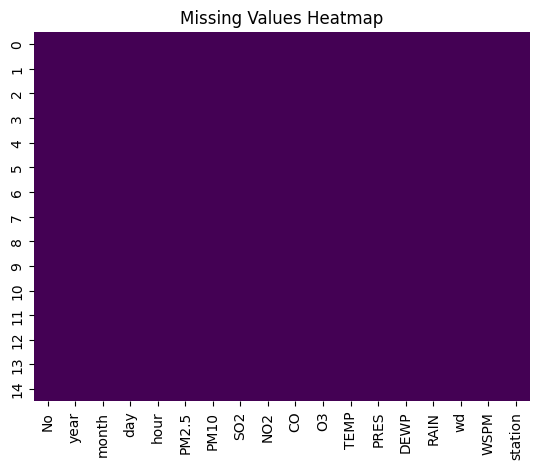

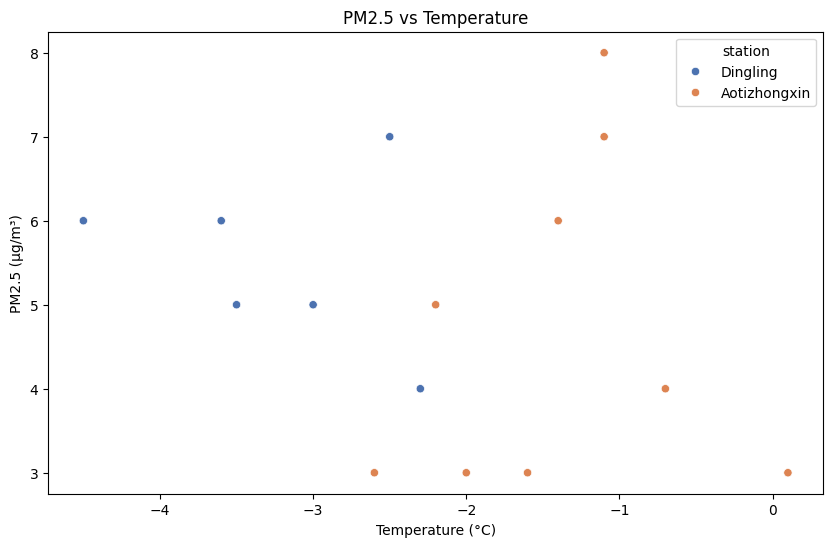

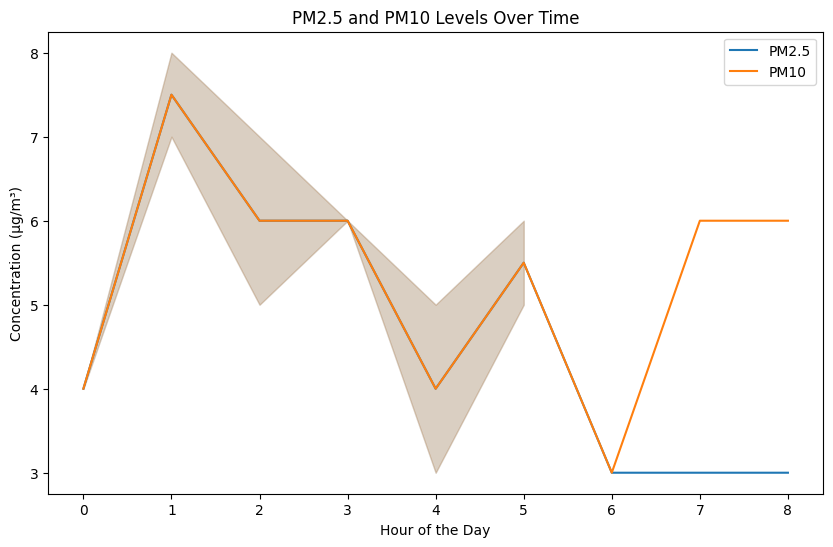

<ipython-input-13-ff9814e1e887>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="wd", data=df, palette="pastel")


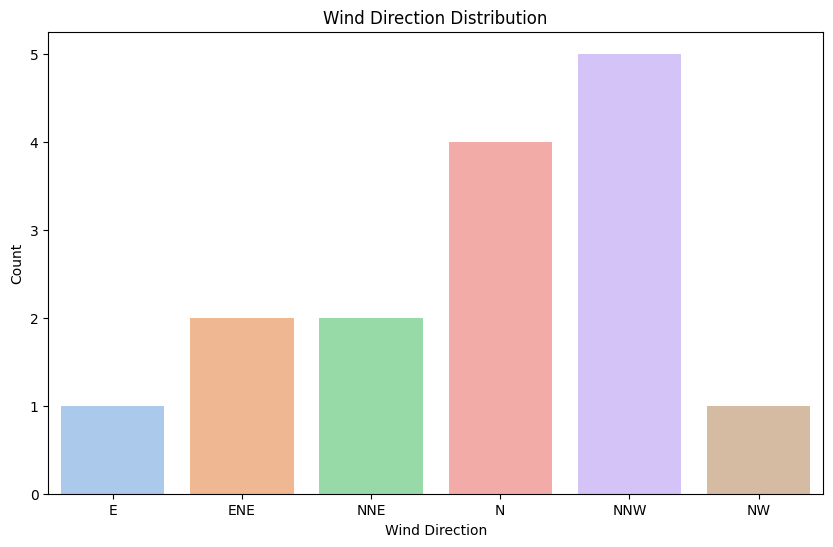

<ipython-input-13-ff9814e1e887>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="station", y="PM2.5", data=df, palette="Set3")


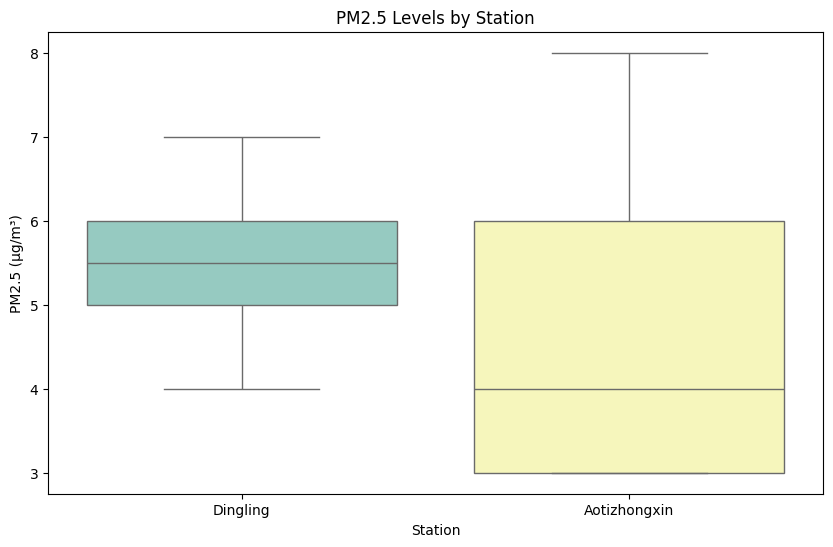

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

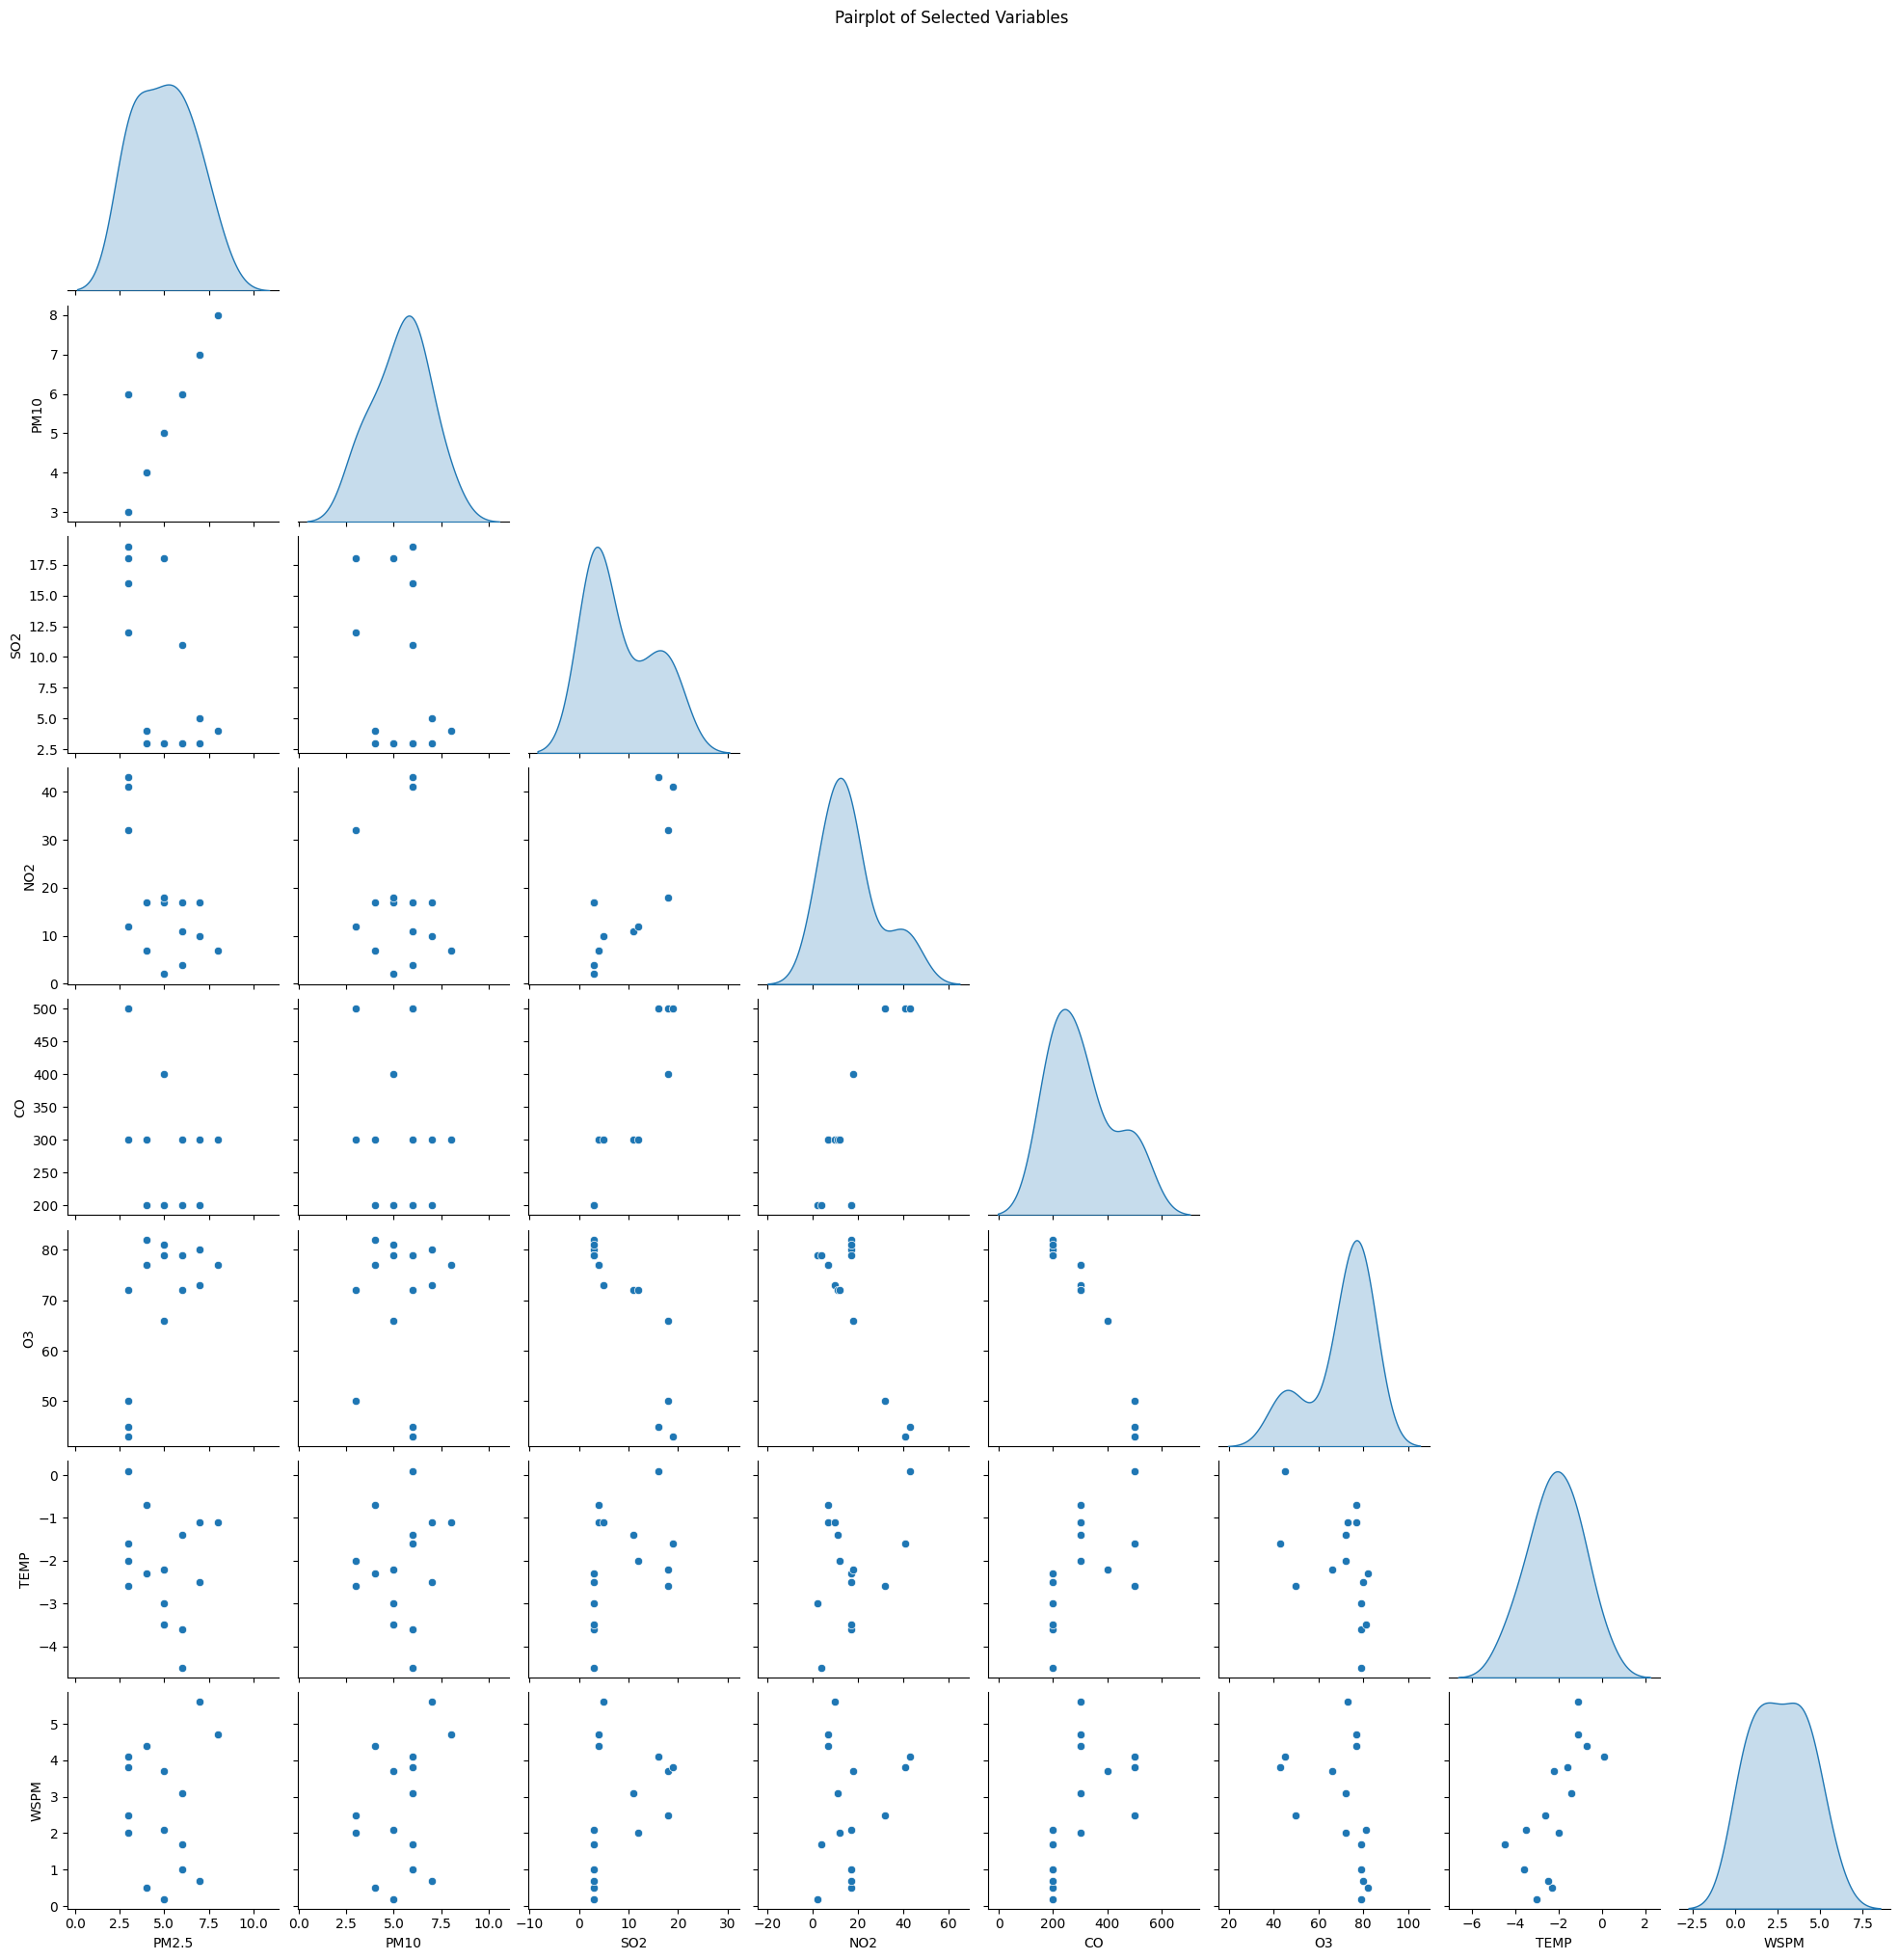

<ipython-input-13-ff9814e1e887>:90: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')  # Forward fill for missing values


Data preprocessing complete!


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
data = {
    "No": [1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "year": [2013]*15,
    "month": [3]*15,
    "day": [1]*15,
    "hour": [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "PM2.5": [4, 7, 5, 6, 5, 6, 4, 8, 7, 6, 3, 5, 3, 3, 3],
    "PM10": [4, 7, 5, 6, 5, 6, 4, 8, 7, 6, 3, 5, 3, 6, 6],
    "SO2": [3, 3, 3, 3, 3, 3, 4, 4, 5, 11, 12, 18, 18, 19, 16],
    "NO2": [np.nan, np.nan, 2, np.nan, np.nan, 4, 7, 7, 10, 11, 12, 18, 32, 41, 43],
    "CO": [200, 200, 200, 200, 200, 200, 300, 300, 300, 300, 300, 400, 500, 500, 500],
    "O3": [82, 80, 79, 79, 81, 79, 77, 77, 73, 72, 72, 66, 50, 43, 45],
    "TEMP": [-2.3, -2.5, -3, -3.6, -3.5, -4.5, -0.7, -1.1, -1.1, -1.4, -2, -2.2, -2.6, -1.6, 0.1],
    "PRES": [1020.8, 1021.3, 1021.3, 1021.8, 1022.3, 1022.6, 1023, 1023.2, 1023.5, 1024.5, 1025.2, 1025.6, 1026.5, 1027.4, 1028.3],
    "DEWP": [-19.7, -19, -19.9, -19.1, -19.4, -19.5, -18.8, -18.2, -18.2, -19.4, -19.5, -19.6, -19.1, -19.1, -19.2],
    "RAIN": [0]*15,
    "wd": ["E", "ENE", "ENE", "NNE", "N", "NNW", "NNW", "N", "NNW", "NW", "N", "N", "NNE", "NNW", "NNW"],
    "WSPM": [0.5, 0.7, 0.2, 1, 2.1, 1.7, 4.4, 4.7, 5.6, 3.1, 2, 3.7, 2.5, 3.8, 4.1],
    "station": ["Dingling"]*6 + ["Aotizhongxin"]*9
}

df = pd.DataFrame(data)

# Display basic information about the dataset
print("Basic Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Handle missing values
print("\nMissing Values:")
print(df.isnull().sum())

df["NO2"] = df["NO2"].fillna(df["NO2"].mean())

# Visualize missing values (if any remain)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


# PM2.5 vs. TEMP Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["TEMP"], y=df["PM2.5"], hue=df["station"], palette="deep")
plt.title("PM2.5 vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# PM2.5 and PM10 Comparison
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["hour"], y=df["PM2.5"], label="PM2.5")
sns.lineplot(x=df["hour"], y=df["PM10"], label="PM10")
plt.title("PM2.5 and PM10 Levels Over Time")
plt.xlabel("Hour of the Day")
plt.ylabel("Concentration (µg/m³)")
plt.legend()
plt.show()

# Wind Direction Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="wd", data=df, palette="pastel")
plt.title("Wind Direction Distribution")
plt.xlabel("Wind Direction")
plt.ylabel("Count")
plt.show()

# Boxplot of PM2.5 by Station
plt.figure(figsize=(10, 6))
sns.boxplot(x="station", y="PM2.5", data=df, palette="Set3")
plt.title("PM2.5 Levels by Station")
plt.xlabel("Station")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

# Pairplot for selected variables
selected_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "WSPM"]
sns.pairplot(df[selected_columns], corner=True, diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

# Assuming 'merged_df' is your dataframe that contains the merged CSV data
# Handle missing values by forward filling (fill missing data with the previous available value)
merged_df = merged_df.fillna(method='ffill')  # Forward fill for missing values

# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

# Feature engineering: Extract year, month, and day from a datetime column (if available)
if 'date' in merged_df.columns:  # Replace 'date' with the actual datetime column name if different
    merged_df['date'] = pd.to_datetime(merged_df['date'])  # Ensure the column is in datetime format
    merged_df['year'] = merged_df['date'].dt.year  # Extract year from the date
    merged_df['month'] = merged_df['date'].dt.month  # Extract month from the date
    merged_df['day'] = merged_df['date'].dt.day  # Extract day from the date



# Print confirmation message
print("Data preprocessing complete!")



In [ ]:
print(merged_df.columns)


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=975)


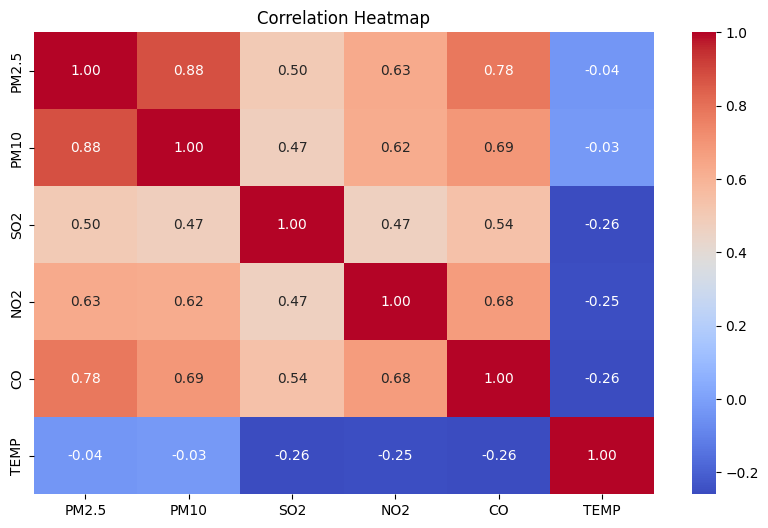

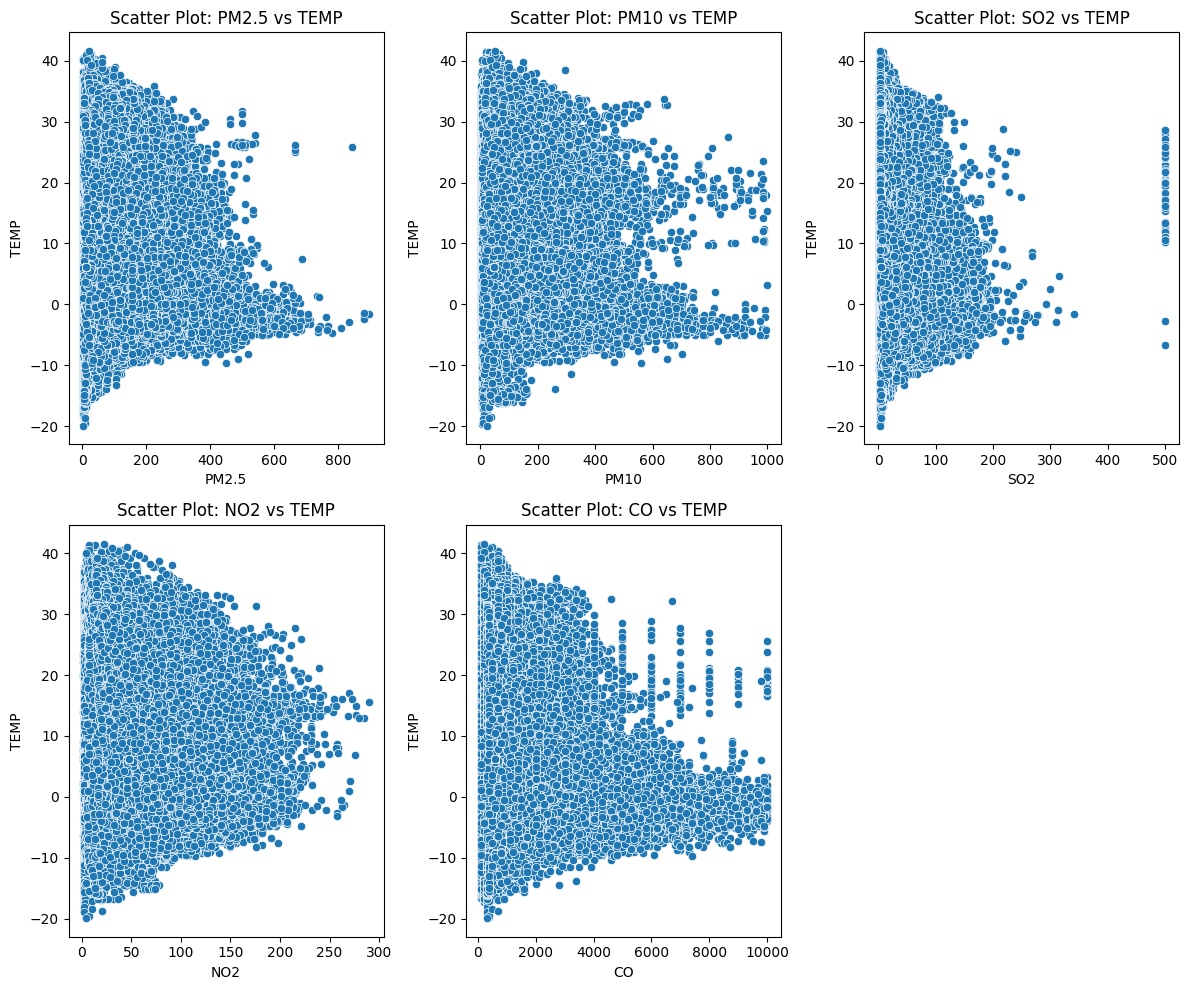

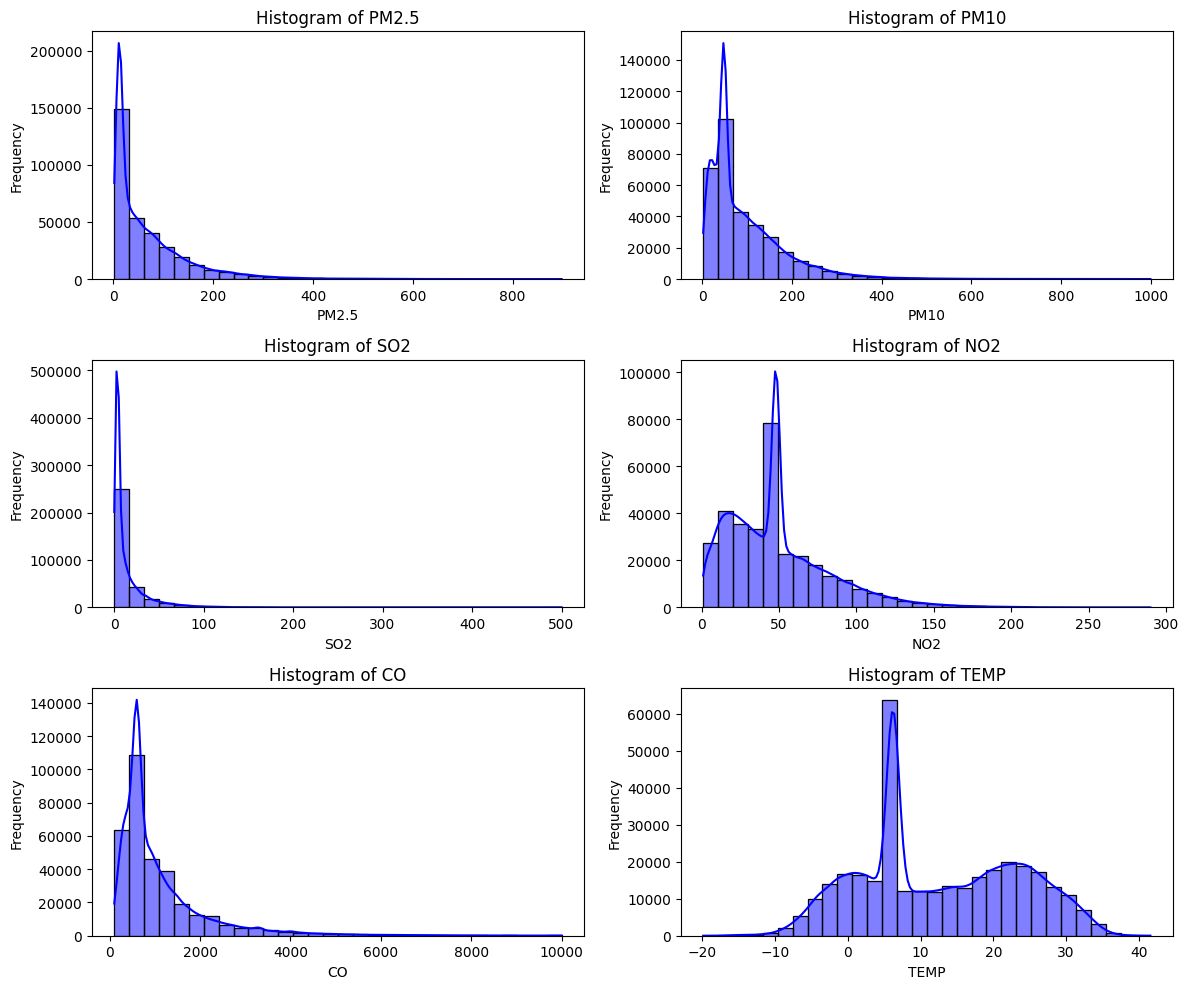

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Columns of interest
columns_of_interest = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP']

# Filter the dataframe to include only these columns
eda_df = merged_df[columns_of_interest]

# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = eda_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_of_interest[:-1]):  # Exclude TEMP from being on the y-axis
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=eda_df, x=col, y='TEMP')
    plt.title(f'Scatter Plot: {col} vs TEMP')
    plt.xlabel(col)
    plt.ylabel('TEMP')
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_of_interest):
    plt.subplot(3, 2, i + 1)
    sns.histplot(eda_df[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**c) Statistics and Visualizations**

# Task 3: Model Building

**1. Data Preparation**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecting features and target
X = merged_df[['TEMP', 'RAIN']]  # Replace with appropriate feature columns
y = merged_df['PM2.5']  # Replace with the target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 5195.2731649521875


Mean Squared Error (MSE): 5195.2731649521875
R-squared Score (R²): 0.1299605254772781


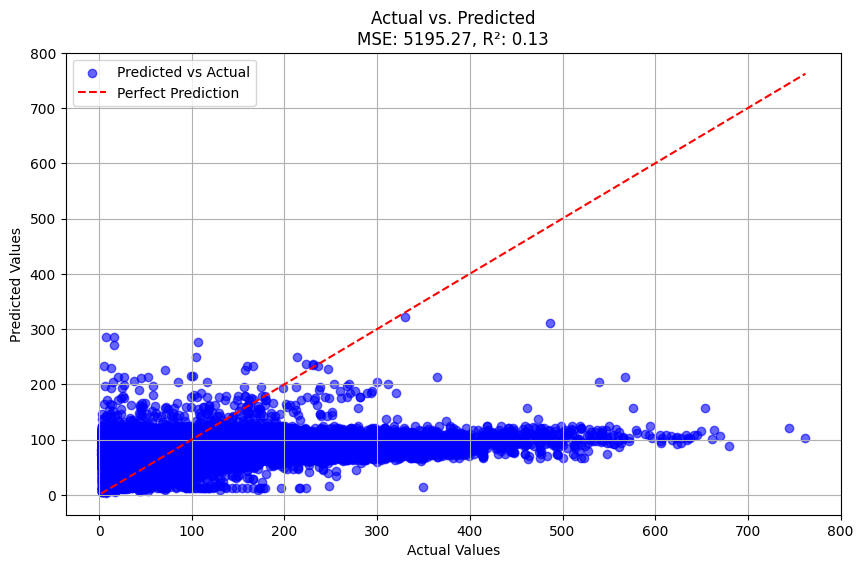

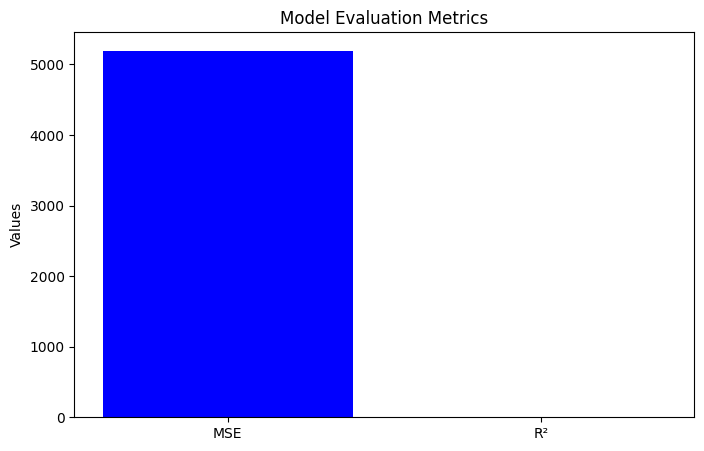

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', label='Perfect Prediction', linestyle='--')
plt.title(f"Actual vs. Predicted\nMSE: {mse:.2f}, R²: {r2:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Bar Chart for Metrics Comparison
metrics = ['MSE', 'R²']
values = [mse, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Values")
plt.show()


# Task 4: GUI Application

In [18]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [19]:
%%writefile streamlit_gui.py
import streamlit as st
import pandas as pd
# Load the dataset
def load_data():
    data = pd.DataFrame({
        "No": [1, 2, 3, 4, 5, 6, 7, 8],
        "year": [2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014],
        "month": [3, 3, 3, 3, 3, 3, 3, 3],
        "day": [1, 1, 1, 1, 1, 1, 1, 1],
        "hour": [0, 1, 2, 3, 4, 5, 6, 7],
        "PM2.5": [5, 8, 3, 5, 5, 3, 4, 3],
        "PM10": [14, 12, 6, 5, 5, 3, 4, 7],
        "SO2": [4, 6, 5, 5, 6, 13, 15, 14],
        "NO2": [12, 14, 14, 14, 21, 21, 32, 45],
        "CO": [200, 200, 200, 200, 200, 300, 300, 400],
        "O3": [85, 84, 83, 84, 77, 77, 62, 48],
        "TEMP": [-0.5, -0.7, -1.2, -1.4, -1.9, -2.4, -2.5, -1.4],
        "PRES": [1024.5, 1025.1, 1025.3, 1026.2, 1027.1, 1027.5, 1028.2, 1029.5],
        "DEWP": [-21.4, -22.1, -24.6, -25.5, -24.5, -21.3, -20.4, -20.4],
        "RAIN": [0, 0, 0, 0, 0, 0, 0, 0],
        "wd": ["NNW", "NW", "NNW", "N", "NNW", "NW", "NW", "NNW"],
        "WSPM": [5.7, 3.9, 5.3, 4.9, 3.2, 2.4, 2.2, 3.0],
        "station": ["Nongzhanguan"] * 8
    })
    return data

data = load_data()

# App title
st.title("Data Analysis App")

# Sidebar menu
option = st.sidebar.radio("Select an Option:", ["Dataset Info", "Data Visualization", "Prediction"])

if option == "Dataset Info":
    st.header("Dataset Information")
    st.write("Here are the first 10 rows of the dataset:")
    st.dataframe(data.head(10))
    st.write("Summary of dataset:")
    st.write(data.describe())

elif option == "Data Visualization":
    st.header("Data Visualization")

    # Select a column to visualize
    column = st.selectbox("Select a column to visualize:", data.columns[4:])

    st.bar_chart(data[column])

elif option == "Prediction":
    st.header("Prediction")

    # Simple prediction example: User inputs values, app predicts PM2.5 level
    st.write("Enter the following details for prediction:")

    year = st.number_input("Year:", min_value=2013, max_value=2023, value=2013)
    month = st.number_input("Month:", min_value=1, max_value=12, value=3)
    day = st.number_input("Day:", min_value=1, max_value=31, value=1)
    hour = st.number_input("Hour:", min_value=0, max_value=23, value=0)
    pm10 = st.number_input("PM10:", value=10.0)
    so2 = st.number_input("SO2:", value=5.0)

    # Basic rule-based prediction
    if st.button("Predict PM2.5"):
        predicted_pm25 = pm10 * 0.5 + so2 * 0.2  # Example rule
        st.write(f"Predicted PM2.5 level: {predicted_pm25:.2f}")




Writing streamlit_gui.py


In [20]:
!wget -q -O - ipv4.icanhazip.com

34.32.191.33


In [ ]:

!streamlit run streamlit_gui.py & npx localtunnel --port 8501




⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.32.191.33:8501

⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://many-months-invent.loca.lt
